<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/transformers_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets

In [22]:
from IPython.display import YouTubeVideo
from transformers import pipeline

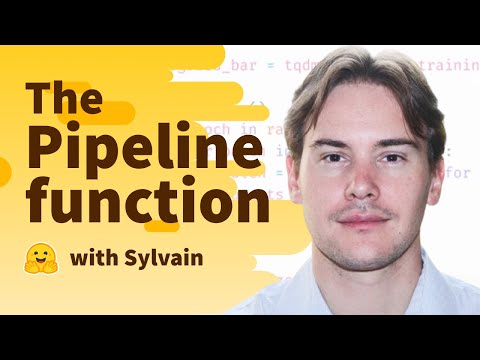

In [21]:
YouTubeVideo('tiZFewofSLM')

What is a pipeline?<br>
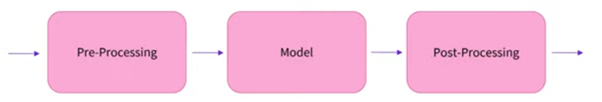

## Sentiment analysis

In [24]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [25]:
classifier("We are very happy to show you the 🤗 Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [ ]:
results = classifier(["We are very happy to show you the 🤗 Transformers library.", "We hope you don't hate it."])

for result in results:

    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")